In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# 1) 데이터 준비
# ----------------------------
file_path = "/content/drive/MyDrive/Col/머신러닝 3주차/Raisin_Dataset.xlsx"
df = pd.read_excel(file_path)

# 불러온 데이터 확인
df


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


Class
Kecimen    450
Besni      450
Name: count, dtype: int64


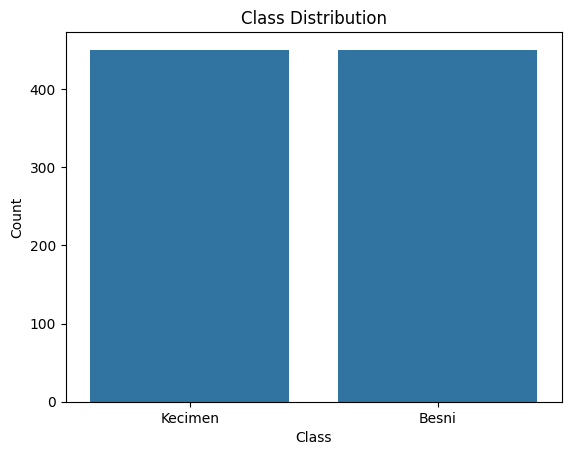


=== 결측치 확인 ===
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

=== 레이블 인코딩 후 데이터 ===


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


In [ ]:
# 레이블 불균형 확인
print(df['Class'].value_counts())

# 레이블 갯수 그래프로 확인
sns.countplot(data = df, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

# 결측치 확인
print("\n=== 결측치 확인 ===")
print(df.isnull().sum())

# 'Class' 컬럼의 문자열 데이터를 숫자형으로 변환
# 'Besni'와 'Kecimen'을 각각 0과 1로 변환합니다.
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# 변환 후 데이터 확인
print("\n=== 레이블 인코딩 후 데이터 ===")
df.head()

In [ ]:
# 입력(X)과 출력(y) 분리
X = df.drop(columns=["Class"])
y = df["Class"]

# 훈련과 테스트 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 분리된 데이터 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(720, 7) (180, 7) (720,) (180,)


In [ ]:
# ----------------------------
# 2) 모델 구성
# ----------------------------
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=1000) # max_iter 값을 늘려 수렴을 돕습니다.

# ----------------------------
# 3) 모델 학습
# ----------------------------
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# ----------------------------
# 4) 예측결과 생성
# ----------------------------
dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)


# ----------------------------
# 5) 정확도 평가
# ----------------------------
dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred)
lr_acc = accuracy_score(y_test, lr_y_pred)

print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print(confusion_matrix(y_test, dt_y_pred))

print("\n=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print(confusion_matrix(y_test, rf_y_pred))

print("\n=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print(confusion_matrix(y_test, lr_y_pred))

=== DT Test Accuracy ===
Decision Tree : 0.8444
[[70 20]
 [ 8 82]]

=== RF Test Accuracy ===
Random Forest : 0.8667
[[71 19]
 [ 5 85]]

=== LR Test Accuracy ===
Logistic Reg. : 0.8889
[[74 16]
 [ 4 86]]
